In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Trigger import *

df = pd.read_csv("test.csv")
df.sort_values(["file"], inplace=True, ascending=False)
df

,Unnamed: 0,file,length,start_frame,end_frame,rect_min_x,rect_min_y,rect_max_x,rect_max_y,section,time_block,line_fit
9,9,./data//M20190901_044600_USUtah_UT3_N1.avi,30.083218,24,43,1065.0,829.0,1074.0,859.0,120,4,NaN
6,6,./data//M20190901_044525_USUtah_UT3_N1.avi,33.241539,28,33,718.0,833.0,722.0,866.0,118,8,NaN
0,0,./data//M20190901_044327_USUtah_UT3_N1.avi,20.024984,17,20,1748.0,594.0,1767.0,595.0,78,7,NaN
1,1,./data//M20190901_044327_USUtah_UT3_N1.avi,237.427887,26,44,1320.0,333.0,1516.0,467.0,59,6,NaN
4,4,./data//M20190901_044218_USUtah_UT3_N1.avi,100.284592,28,42,1782.0,412.0,1801.0,526.0,62,8,NaN
11,11,./data//M20190901_044136_USUtah_UT3_N1.avi,207.935089,24,47,1061.0,400.0,1194.0,560.0,73,4,NaN
10,10,./data//M20190901_044120_USUtah_UT3_N1.avi,150.950317,28,38,1670.0,2.0,1800.0,78.0,14,8,NaN
5,5,./data//M20190901_043930_USUtah_UT3_N1.avi,61.032780,25,37,985.0,810.0,1005.0,868.0,104,5,NaN
12,12,./data//M20190901_043910_USUtah_UT3_N1.avi,131.711807,29,37,983.0,47.0,1085.0,132.0,8,9,NaN
13,13,./data//M20190901_043910_USUtah_UT3_N1.avi,22.803509,1,67,1814.0,751.0,1834.0,763.0,111,1,NaN


In [2]:
triggers = read_df(df)
triggers

array([Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=20.02498435974121, start_frame=17, end_frame=20, bounding_rect=Rect(min_x=1748.0, min_y=594.0, max_x=1767.0, max_y=595.0), section=78, time_block=7, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=237.42788696289065, start_frame=26, end_frame=44, bounding_rect=Rect(min_x=1320.0, min_y=333.0, max_x=1516.0, max_y=467.0), section=59, time_block=6, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=118.00423431396484, start_frame=28, end_frame=39, bounding_rect=Rect(min_x=104.0, min_y=402.0, max_x=176.0, max_y=494.0), section=49, time_block=8, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=30.2324333190918, start_frame=39, end_frame=55, bounding_rect=Rect(min_x=1687.0, min_y=987.0, max_x=1704.0, max_y=1012.0), section=142, time_block=9, line_fit=nan),
       Trigger(file

trigger.file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), trigger.length=20.02498435974121


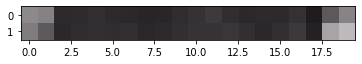

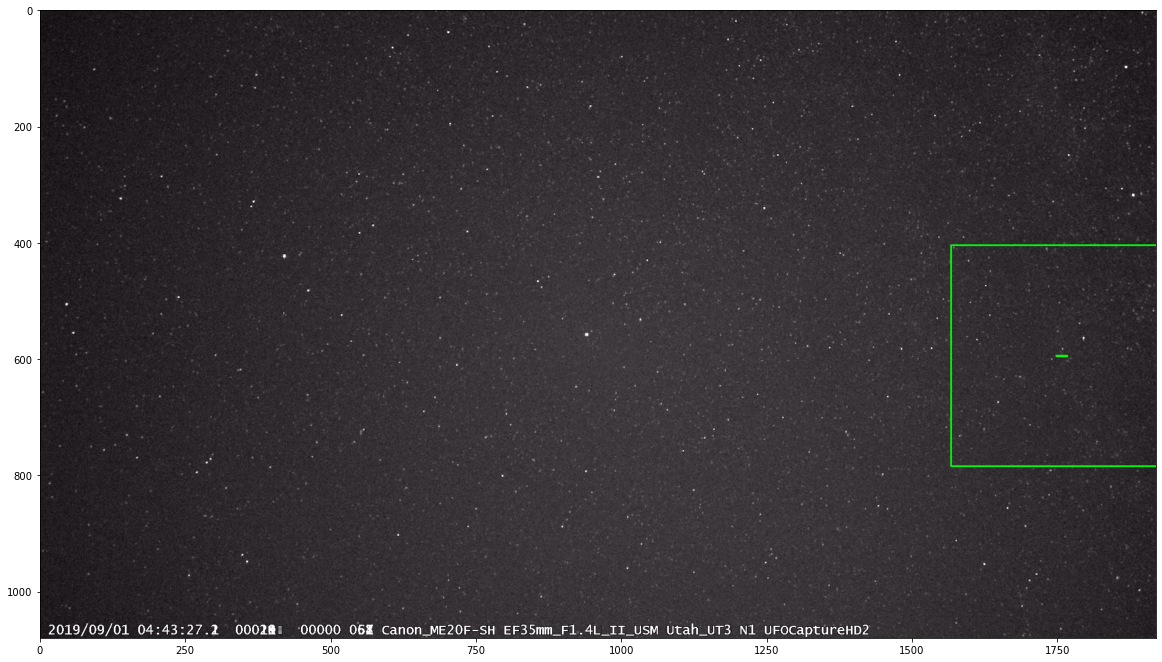

trigger.file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), trigger.length=237.42788696289065


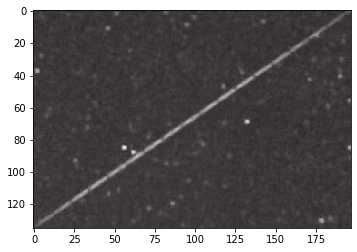

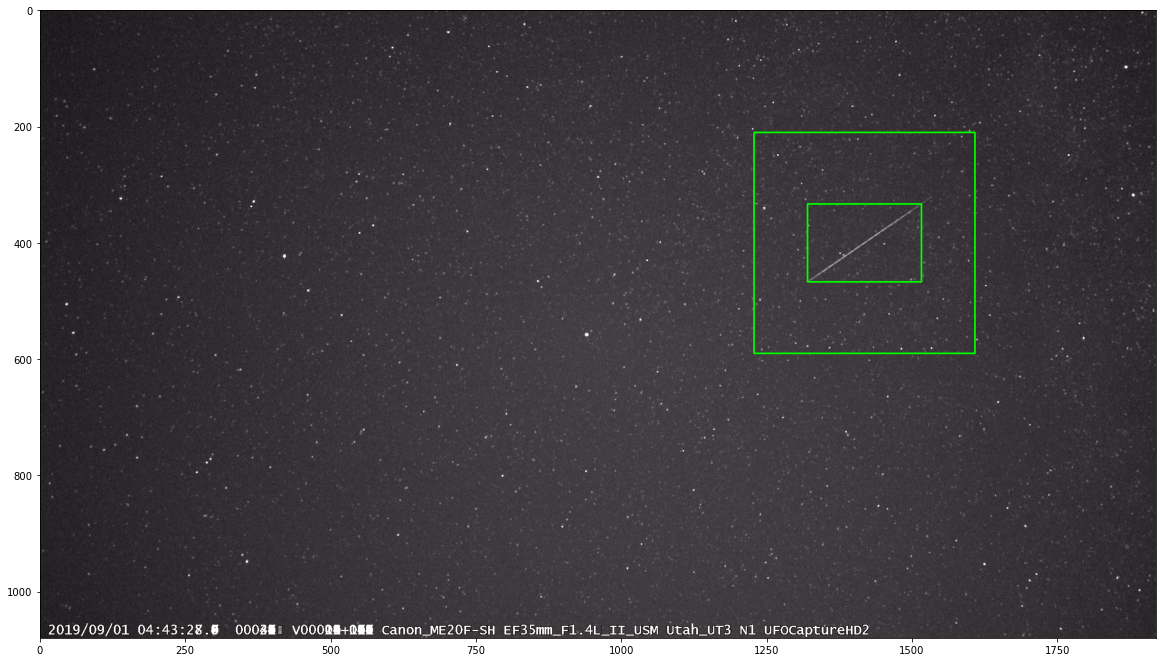

In [3]:
from IPython.core.display import display

for trigger in triggers:
    print(f"{trigger.file=}, {trigger.length=}")

    combined = combine_frames(get_frames(trigger))

    # image = mark_rect(image, center_rect(trigger, Vec2(40, 40)))

    image = cut_rect_from_frame(combined, trigger.bounding_rect)
    plt.imshow(image)
    plt.show()

    image = mark_rect(combined, center_rect(trigger, Vec2(190, 190)))

    image = mark_rect(image, trigger.bounding_rect)
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.show()

    display(animate([cut_rect_from_frame(frame, trigger.bounding_rect) for frame in get_frames(trigger)]))
